In [251]:
import os
import pandas as pd
from tensorflow.keras.models import load_model

In [252]:
models = []
seven_models_ = ['7.9.8', '7.10.9', '8.9.8', '8.10.8', '8.10.9', '9.6.7', '9.6.8']
v = 5

project_dir_path = os.environ["NIR_1_sem_magistracy"]
dir_model = 'saved_models'
layer = 'third'
path_dir_model = os.path.join(project_dir_path, dir_model, layer, f'_{v}')
for i in range(len(seven_models_)):
    path = os.path.join(path_dir_model, seven_models_[i] + f'_{v}')
    models.append([seven_models_[i] + f'_{v}', seven_models_[i], load_model(path)])
    print(seven_models_[i])

7.9.8
7.10.9
8.9.8
8.10.8
8.10.9
9.6.7
9.6.8


In [253]:
models

[['7.9.8_5', '7.9.8', <keras.engine.functional.Functional at 0x7fc00ebd03d0>],
 ['7.10.9_5',
  '7.10.9',
 ['8.9.8_5', '8.9.8', <keras.engine.functional.Functional at 0x7fc00ed30850>],
 ['8.10.8_5',
  '8.10.8',
 ['8.10.9_5',
  '8.10.9',
 ['9.6.7_5', '9.6.7', <keras.engine.functional.Functional at 0x7fc00e8dedc0>],
 ['9.6.8_5', '9.6.8', <keras.engine.functional.Functional at 0x7fc00e7b7af0>]]

In [254]:
import sys

lib_dir = 'lib'
lib_dir_path = os.path.join(project_dir_path, lib_dir)
sys.path.append(lib_dir_path)
from nn_train.tools import pa_fields, seven_fields, fields, save_to_db, groupby, make_valid_df
from nn_train.neural_network import NeuralNetwork

In [255]:
#Test on Aleksashina 1 - Incorrect cases in '00:00:35.000', '00:00:37.000'

In [256]:
data_dir = 'Data'
data_dir = os.path.join(project_dir_path, data_dir)
csv_file = "Participant 1_Aleksashina_Analysis 1_video_20190607_114857_detailed.csv"
csv_path = os.path.join(data_dir, csv_file)
csv_path

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Data/Participant 1_Aleksashina_Analysis 1_video_20190607_114857_detailed.csv'

In [257]:
df_test = pd.read_csv(csv_path, sep='\t', skiprows = lambda i: i in range(8))
df_first = df_test.columns[0]
df_test.columns = df_test.columns[1:].insert(-2, 'UNKNOWN')
df_test.insert(0, df_first, df_test.index)
df_test

,Video Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal,...,Action Unit 12 - Right - Lip Corner Puller,Action Unit 14 - Right - Dimpler,Action Unit 15 - Right - Lip Corner Depressor,Action Unit 20 - Right - Lip Stretcher,Action Unit 43 - Right - Eyes Closed,Stimulus,Event Marker,UNKNOWN,Participant Name,Analysis Index
00:00:00.000,00:00:00.000,0.973121,0.019527,0.000404,0.043879,0.004099,0.000322,0.001946,-0.024352,0.255187,...,0.0,0.017570,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Aleksashina,Analysis 1
00:00:00.100,00:00:00.100,0.974289,0.020129,0.000382,0.042413,0.004014,0.000298,0.001820,-0.022284,0.260074,...,0.0,0.032680,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Aleksashina,Analysis 1
00:00:00.200,00:00:00.200,0.975457,0.020731,0.000361,0.040947,0.003930,0.000273,0.001693,-0.020216,0.264960,...,0.0,0.047791,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Aleksashina,Analysis 1
00:00:00.300,00:00:00.300,0.975028,0.020480,0.000345,0.042622,0.003916,0.000256,0.001549,-0.022143,0.269347,...,0.0,0.060645,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Aleksashina,Analysis 1
00:00:00.400,00:00:00.400,0.974542,0.020394,0.000326,0.044417,0.003831,0.000235,0.001438,-0.024022,0.273202,...,0.0,0.068510,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Aleksashina,Analysis 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:01:50.900,00:01:50.900,0.969587,0.016939,0.000846,0.051552,0.004851,0.000162,0.000609,-0.034614,0.317045,...,0.0,0.199020,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Aleksashina,Analysis 1
00:01:51.000,00:01:51.000,0.969071,0.017130,0.000856,0.052158,0.004848,0.000168,0.000615,-0.035027,0.316651,...,0.0,0.202110,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Aleksashina,Analysis 1
00:01:51.100,00:01:51.100,0.968842,0.017460,0.000885,0.052096,0.004807,0.000172,0.000620,-0.034636,0.316144,...,0.0,0.196561,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Aleksashina,Analysis 1
00:01:51.200,00:01:51.200,0.968608,0.018322,0.000899,0.052130,0.004756,0.000176,0.000617,-0.033808,0.315641,...,0.0,0.196161,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Aleksashina,Analysis 1


In [258]:
seven_vector_test = df_test[seven_fields]
seven_vector_test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:00.000,0.973121,0.019527,0.000404,0.043879,0.004099,0.000322,0.001946
00:00:00.100,0.974289,0.020129,0.000382,0.042413,0.004014,0.000298,0.001820
00:00:00.200,0.975457,0.020731,0.000361,0.040947,0.003930,0.000273,0.001693
00:00:00.300,0.975028,0.020480,0.000345,0.042622,0.003916,0.000256,0.001549
00:00:00.400,0.974542,0.020394,0.000326,0.044417,0.003831,0.000235,0.001438
...,...,...,...,...,...,...,...
00:01:50.900,0.969587,0.016939,0.000846,0.051552,0.004851,0.000162,0.000609
00:01:51.000,0.969071,0.017130,0.000856,0.052158,0.004848,0.000168,0.000615
00:01:51.100,0.968842,0.017460,0.000885,0.052096,0.004807,0.000172,0.000620
00:01:51.200,0.968608,0.018322,0.000899,0.052130,0.004756,0.000176,0.000617


In [259]:
pa_vector_test = df_test[pa_fields]
pa_vector_test

,Valence,Arousal
00:00:00.000,-0.024352,0.255187
00:00:00.100,-0.022284,0.260074
00:00:00.200,-0.020216,0.264960
00:00:00.300,-0.022143,0.269347
00:00:00.400,-0.024022,0.273202
...,...,...
00:01:50.900,-0.034614,0.317045
00:01:51.000,-0.035027,0.316651
00:01:51.100,-0.034636,0.316144
00:01:51.200,-0.033808,0.315641


### Тестируем 7.9.8 модель

In [260]:
nn_test = NeuralNetwork(pa_vector_test, seven_vector_test, models[0][2])

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


In [261]:
#Будем дообучаться с '00:00:30.000' до '00:00:38.000'

In [262]:
df_x = nn_test.get_df_xy('00:00:30.000', '00:00:38.000')
df_x

,Valence,Arousal
00:00:30.000,0.725731,0.339765
00:00:30.100,0.737862,0.339765
00:00:30.200,0.726528,0.339271
00:00:30.300,0.712153,0.338363
00:00:30.400,0.709858,0.337356
...,...,...
00:00:37.600,0.002470,0.274409
00:00:37.700,-0.014269,0.274178
00:00:37.800,-0.012094,0.273958
00:00:37.900,0.001319,0.273736


In [263]:
df_y = nn_test.get_df_xy(xy = 'y') # Некорректный результат. Показывает Happy и Angry, но в дейстивтельности это Neutral,
#о чём и говорит нейросеть
df_y

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:30.000,0.132133,0.756668,0.001669,0.030937,0.000408,0.000671,0.001260
00:00:30.100,0.130447,0.768046,0.001361,0.030184,0.000499,0.000711,0.001268
00:00:30.200,0.147706,0.755921,0.001117,0.029393,0.000589,0.000680,0.001202
00:00:30.300,0.164955,0.739512,0.001299,0.027358,0.000643,0.000609,0.001229
00:00:30.400,0.171592,0.735537,0.001367,0.025679,0.000635,0.000525,0.001322
...,...,...,...,...,...,...,...
00:00:37.600,0.227043,0.561071,0.000104,0.558601,0.000207,0.000137,0.000757
00:00:37.700,0.225937,0.553081,0.000104,0.567351,0.000206,0.000137,0.000822
00:00:37.800,0.227376,0.557128,0.000104,0.569222,0.000204,0.000138,0.000881
00:00:37.900,0.228799,0.561518,0.000105,0.560199,0.000205,0.000137,0.000959


In [264]:
nn_test.predict()

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:30.000,0.240125,0.750082,1.615867e-08,2.470247e-11,2.362448e-13,0.000192,8.076376e-08
00:00:30.100,0.227305,0.762525,1.295145e-08,1.785422e-11,1.552351e-13,0.000183,7.051761e-08
00:00:30.200,0.239419,0.750927,1.592452e-08,2.419697e-11,2.298054e-13,0.000191,8.004513e-08
00:00:30.300,0.255498,0.735690,2.069546e-08,3.559246e-11,3.779374e-13,0.000201,9.400065e-08
00:00:30.400,0.258407,0.733228,2.157749e-08,3.789773e-11,4.091493e-13,0.000201,9.643910e-08
...,...,...,...,...,...,...,...
00:00:37.600,0.963113,0.010644,8.526266e-03,5.025715e-03,1.739228e-02,0.000432,3.601611e-04
00:00:37.700,0.965380,0.000380,1.465124e-02,1.458284e-02,1.248145e-02,0.000845,6.411672e-04
00:00:37.800,0.966175,0.000690,1.373520e-02,1.256865e-02,1.328707e-02,0.000776,5.842447e-04
00:00:37.900,0.964567,0.010008,8.916974e-03,5.362570e-03,1.729921e-02,0.000454,3.678799e-04


In [265]:
df_x = nn_test.get_df_xy('00:00:00.000', '00:00:00.100')
df_x

,Valence,Arousal
00:00:00.000,-0.024352,0.255187
00:00:00.100,-0.022284,0.260074


In [266]:
df_y = nn_test.get_df_xy(xy = 'y') #Neutral
df_y

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:00.000,0.973121,0.019527,0.000404,0.043879,0.004099,0.000322,0.001946
00:00:00.100,0.974289,0.020129,0.000382,0.042413,0.004014,0.000298,0.001820


In [267]:
nn_test.predict() #True

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:00.000,0.959324,0.000060,0.017483,0.021912,0.011942,0.000837,0.000921
00:00:00.100,0.959943,0.000068,0.017189,0.021161,0.011859,0.000852,0.000886


In [268]:
df_x = nn_test.get_df_xy('00:00:16.000', '00:00:17.000')
df_x

,Valence,Arousal
00:00:16.000,0.982274,0.763761
00:00:16.100,0.982497,0.761543
00:00:16.200,0.982457,0.759395
00:00:16.300,0.982780,0.757186
00:00:16.400,0.983181,0.754926
00:00:16.500,0.983513,0.752694
00:00:16.600,0.983897,0.750396
00:00:16.700,0.983741,0.748033
00:00:16.800,0.982967,0.745634
00:00:16.900,0.982504,0.743361


In [269]:
df_y = nn_test.get_df_xy(xy = 'y') # Happy
df_y

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:16.000,0.007980,0.984054,0.000013,0.001780,0.002200,0.001339,0.000060
00:00:16.100,0.007884,0.984246,0.000013,0.001749,0.002323,0.001302,0.000059
00:00:16.200,0.007840,0.984331,0.000013,0.001875,0.002367,0.001226,0.000057
00:00:16.300,0.007679,0.984653,0.000014,0.001873,0.002433,0.001246,0.000056
00:00:16.400,0.007520,0.984970,0.000014,0.001789,0.002598,0.001347,0.000054
00:00:16.500,0.007385,0.985240,0.000014,0.001727,0.002701,0.001379,0.000054
00:00:16.600,0.007240,0.985530,0.000014,0.001633,0.002647,0.001379,0.000053
00:00:16.700,0.007345,0.985320,0.000014,0.001580,0.002596,0.001452,0.000057
00:00:16.800,0.007730,0.984552,0.000013,0.001585,0.002543,0.001457,0.000060
00:00:16.900,0.007821,0.984368,0.000013,0.001865,0.002409,0.001359,0.000064


In [270]:
nn_test.predict() #Happy - True

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:16.000,0.032990,0.921565,1.586804e-10,1.477288e-14,3.445126e-17,0.001897,4.702046e-09
00:00:16.100,0.033067,0.921679,1.579901e-10,1.472767e-14,3.417755e-17,0.001863,4.689722e-09
00:00:16.200,0.033190,0.921685,1.580621e-10,1.478522e-14,3.421720e-17,0.001833,4.691224e-09
00:00:16.300,0.033248,0.921839,1.570865e-10,1.470022e-14,3.382759e-17,0.001799,4.673648e-09
00:00:16.400,0.033294,0.922024,1.558968e-10,1.458663e-14,3.335336e-17,0.001765,4.652125e-09
00:00:16.500,0.033351,0.922180,1.549091e-10,1.449983e-14,3.296365e-17,0.001733,4.634236e-09
00:00:16.600,0.033402,0.922358,1.537810e-10,1.439482e-14,3.251964e-17,0.001699,4.613722e-09
00:00:16.700,0.033561,0.922321,1.541731e-10,1.450014e-14,3.268792e-17,0.001669,4.621155e-09
00:00:16.800,0.033840,0.922038,1.563136e-10,1.485000e-14,3.356563e-17,0.001644,4.660607e-09
00:00:16.900,0.034055,0.921877,1.575940e-10,1.508026e-14,3.409993e-17,0.001618,4.684197e-09


In [271]:
df_x = nn_test.get_df_xy('00:00:21.000', '00:00:23.000')
df_x

,Valence,Arousal
00:00:21.000,0.964579,0.663201
00:00:21.100,0.943782,0.659207
00:00:21.200,0.871111,0.652940
00:00:21.300,0.762326,0.644623
00:00:21.400,0.640243,0.633058
00:00:21.500,0.520727,0.618742
00:00:21.600,0.413288,0.603645
00:00:21.700,0.323662,0.588063
00:00:21.800,0.251679,0.572172
00:00:21.900,0.194049,0.555099


In [272]:
df_y = nn_test.get_df_xy(xy = 'y') #Neutral - растёт, Happy - падает
df_y

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:21.000,0.019636,0.966993,0.000121,0.002414,0.002644,0.002096,0.000165
00:00:21.100,0.051523,0.946047,0.000221,0.002265,0.002547,0.002061,0.000355
00:00:21.200,0.135548,0.875374,0.000303,0.004263,0.002576,0.001903,0.000715
00:00:21.300,0.247636,0.770754,0.000351,0.008427,0.002592,0.001688,0.000968
00:00:21.400,0.365667,0.655739,0.000364,0.015496,0.002655,0.001459,0.001092
00:00:21.500,0.477339,0.544180,0.000356,0.023453,0.002761,0.001233,0.001120
00:00:21.600,0.576351,0.443905,0.000341,0.030617,0.002846,0.001026,0.001090
00:00:21.700,0.660592,0.357482,0.000767,0.033820,0.002812,0.000842,0.001407
00:00:21.800,0.730230,0.284993,0.004092,0.033314,0.002743,0.000681,0.002124
00:00:21.900,0.786891,0.225365,0.007646,0.031317,0.002668,0.000547,0.002939


In [273]:
nn_test.predict() #Neutral, Happy - True

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:21.000,0.042912,0.915312,2.162456e-10,2.706395e-14,6.285278e-17,0.000931,5.696284e-09
00:00:21.100,0.048555,0.905948,3.158290e-10,4.746755e-14,1.290590e-16,0.000979,7.186233e-09
00:00:21.200,0.068525,0.868999,1.132865e-09,3.070934e-13,1.776712e-15,0.001029,1.630750e-08
00:00:21.300,0.102201,0.798802,7.148680e-09,4.417636e-12,1.055289e-13,0.000848,5.619570e-08
00:00:21.400,0.157600,0.690361,5.660049e-08,8.861661e-11,1.027739e-11,0.000676,2.251709e-07
00:00:21.500,0.234940,0.558638,4.300416e-07,1.683744e-09,9.031949e-10,0.000534,8.757727e-07
00:00:21.600,0.325573,0.431855,2.666575e-06,2.391515e-08,5.025584e-08,0.000428,2.968108e-06
00:00:21.700,0.415388,0.331602,1.224619e-05,2.207079e-07,1.426965e-06,0.000352,8.211545e-06
00:00:21.800,0.494776,0.260172,4.176845e-05,1.328285e-06,2.081750e-05,0.000296,1.858186e-05
00:00:21.900,0.562019,0.210409,1.119179e-04,5.661183e-06,1.763403e-04,0.000253,3.570012e-05


In [274]:
df_x = nn_test.get_df_xy('00:00:36.000', '00:00:37.000')
df_x

,Valence,Arousal
00:00:36.000,-0.214707,0.260461
00:00:36.100,-0.215263,0.259816
00:00:36.200,-0.183632,0.259228
00:00:36.300,-0.147168,0.258936
00:00:36.400,-0.117836,0.258876
00:00:36.500,-0.091053,0.258876
00:00:36.600,-0.067193,0.262077
00:00:36.700,-0.040169,0.265263
00:00:36.800,-0.026193,0.267305
00:00:36.900,-0.011659,0.269329


In [275]:
df_y = nn_test.get_df_xy(xy = 'y') # Некорректный кейс. Neutral (а он показывает Happy и Angry), но нейронка верно
# предсказывает
df_y

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:36.000,0.189787,0.446914,0.000195,0.661620,0.000168,0.000154,0.000912
00:00:36.100,0.184945,0.455178,0.000176,0.670441,0.000158,0.000153,0.000907
00:00:36.200,0.189195,0.478034,0.000159,0.661666,0.000151,0.000145,0.000883
00:00:36.300,0.196710,0.498410,0.000149,0.645577,0.000148,0.000137,0.000835
00:00:36.400,0.201433,0.516213,0.000143,0.634049,0.000147,0.000128,0.000784
00:00:36.500,0.206537,0.530494,0.000139,0.621547,0.000150,0.000119,0.000746
00:00:36.600,0.213259,0.539001,0.000133,0.606194,0.000154,0.000111,0.000718
00:00:36.700,0.216637,0.549414,0.000127,0.589583,0.000160,0.000107,0.000705
00:00:36.800,0.218805,0.557725,0.000121,0.583918,0.000159,0.000102,0.000706
00:00:36.900,0.219156,0.565864,0.000115,0.577523,0.000164,0.000101,0.000695


In [276]:
nn_test.predict() # НОРМАЛЬНО.

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:36.000,0.755528,1.286897e-10,0.061395,0.233762,0.017282,0.002433,0.016973
00:00:36.100,0.755496,1.279189e-10,0.061441,0.233904,0.017229,0.002422,0.017033
00:00:36.200,0.775305,2.606704e-10,0.058222,0.222593,0.020303,0.002447,0.013722
00:00:36.300,0.821680,1.667687e-09,0.049140,0.170056,0.021036,0.002172,0.008824
00:00:36.400,0.874494,2.352193e-08,0.037953,0.104870,0.018245,0.001702,0.004988
00:00:36.500,0.910412,2.633896e-07,0.029909,0.065707,0.016017,0.001363,0.002959
00:00:36.600,0.933656,2.166783e-06,0.024210,0.042928,0.014298,0.001146,0.001864
00:00:36.700,0.953222,2.371514e-05,0.019024,0.026227,0.012564,0.000938,0.001103
00:00:36.800,0.959942,6.897108e-05,0.017075,0.020962,0.011860,0.000869,0.000872
00:00:36.900,0.966187,6.984472e-04,0.013794,0.012626,0.013360,0.000765,0.000590


In [277]:
df_x = nn_test.get_df_xy('00:00:42.000', '00:00:42.500')
df_x

,Valence,Arousal
00:00:42.000,-0.431208,0.258913
00:00:42.100,-0.276828,0.258345
00:00:42.200,-0.126044,0.257805
00:00:42.300,0.012774,0.257292
00:00:42.400,0.132797,0.256804
00:00:42.500,0.236716,0.256341


In [278]:
df_y = nn_test.get_df_xy(xy = 'y') # Из Neutral/Angry в Happy 
df_y

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:42.000,0.502243,0.181685,0.000275,0.612893,0.003011,0.000579,0.002119
00:00:42.100,0.535251,0.241092,0.000246,0.517920,0.004662,0.000863,0.002023
00:00:42.200,0.544003,0.302449,0.000221,0.428494,0.006192,0.001107,0.001881
00:00:42.300,0.536196,0.361938,0.000196,0.349164,0.007338,0.001198,0.001740
00:00:42.400,0.522931,0.414101,0.000175,0.281304,0.008044,0.001221,0.001633
00:00:42.500,0.502529,0.461604,0.000155,0.224888,0.008423,0.001205,0.001563


In [279]:
nn_test.predict() # True

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:42.000,0.595768,1.041123e-12,0.088113,0.320715,0.005556,0.002180,0.071825
00:00:42.100,0.715115,3.284639e-11,0.068140,0.256785,0.012492,0.002330,0.025848
00:00:42.200,0.861664,1.138760e-08,0.040779,0.120313,0.018970,0.001807,0.005845
00:00:42.300,0.951576,1.688400e-02,0.006297,0.003248,0.017888,0.000285,0.000322
00:00:42.400,0.801942,1.495929e-01,0.000395,0.000060,0.000935,0.000066,0.000068
00:00:42.500,0.732491,2.225163e-01,0.000068,0.000005,0.000019,0.000076,0.000021


In [280]:
df_x = nn_test.get_df_xy('00:00:42.500', '00:00:43.000')
df_x

,Valence,Arousal
00:00:42.500,0.236716,0.256341
00:00:42.600,0.321085,0.255900
00:00:42.700,0.388269,0.255482
00:00:42.800,0.446405,0.255151
00:00:42.900,0.496219,0.255151
00:00:43.000,0.541093,0.258207


In [281]:
df_y = nn_test.get_df_xy(xy = 'y') # Happy растёт - верно. Остальное - шум.
df_y

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:42.500,0.502529,0.461604,0.000155,0.224888,0.008423,0.001205,0.001563
00:00:42.600,0.478964,0.499737,0.000136,0.178652,0.008664,0.001159,0.001451
00:00:42.700,0.460155,0.529674,0.000120,0.141405,0.008811,0.001105,0.001370
00:00:42.800,0.436789,0.558047,0.000108,0.111643,0.008762,0.001038,0.001290
00:00:42.900,0.412718,0.584249,0.000096,0.088029,0.008597,0.000969,0.001202
00:00:43.000,0.387863,0.610635,0.000088,0.069542,0.008211,0.000915,0.001102


In [282]:
nn_test.predict() # True

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:42.500,0.732491,0.222516,6.847038e-05,4.838149e-06,1.858131e-05,0.000076,2.072011e-05
00:00:42.600,0.665946,0.298191,1.649342e-05,6.243842e-07,7.709167e-07,0.000086,7.926694e-06
00:00:42.700,0.607634,0.367884,5.309569e-06,1.223027e-07,6.114850e-08,0.000095,3.687960e-06
00:00:42.800,0.554472,0.433143,1.991085e-06,2.983518e-08,6.823634e-09,0.000103,1.902094e-06
00:00:42.900,0.507639,0.491095,8.590074e-07,8.899358e-09,1.042864e-09,0.000111,1.078611e-06
00:00:43.000,0.462975,0.543875,4.018848e-07,2.966165e-09,1.932868e-10,0.000120,6.474273e-07


In [283]:
df_x = nn_test.get_df_xy('00:00:47.000', '00:00:48.000')
df_x

,Valence,Arousal
00:00:47.000,0.402050,0.299550
00:00:47.100,0.402333,0.299550
00:00:47.200,0.403500,0.299481
00:00:47.300,0.406274,0.299384
00:00:47.400,0.406193,0.299230
00:00:47.500,0.415290,0.299125
00:00:47.600,0.418139,0.298942
00:00:47.700,0.423579,0.298760
00:00:47.800,0.431206,0.298555
00:00:47.900,0.440355,0.298336


In [284]:
df_y = nn_test.get_df_xy(xy = 'y') # Neutral - 71-69%, Happy - 40-45%
df_y

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:47.000,0.710237,0.407821,0.000096,0.005771,0.004438,0.000165,0.000185
00:00:47.100,0.711148,0.408063,0.000100,0.005730,0.004281,0.000168,0.000181
00:00:47.200,0.713677,0.409234,0.000102,0.005734,0.004085,0.000167,0.000180
00:00:47.300,0.714254,0.412195,0.000105,0.005921,0.003882,0.000161,0.000175
00:00:47.400,0.716460,0.412444,0.000108,0.006251,0.003699,0.000162,0.000173
00:00:47.500,0.713320,0.421777,0.000107,0.006487,0.003612,0.000162,0.000170
00:00:47.600,0.714224,0.424814,0.000107,0.006675,0.003599,0.000168,0.000171
00:00:47.700,0.710022,0.430272,0.000107,0.006693,0.003646,0.000182,0.000167
00:00:47.800,0.706393,0.437887,0.000105,0.006681,0.003628,0.000192,0.000165
00:00:47.900,0.701044,0.447169,0.000104,0.006814,0.003610,0.000197,0.000161


In [285]:
nn_test.predict() # Норм.

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:00:47.000,0.562111,0.387515,0.000004,7.687373e-08,3.997334e-08,0.000116,0.000003
00:00:47.100,0.561848,0.387829,0.000004,7.634784e-08,3.954963e-08,0.000116,0.000003
00:00:47.200,0.560814,0.389122,0.000004,7.422900e-08,3.784094e-08,0.000117,0.000003
00:00:47.300,0.558305,0.392206,0.000004,6.941295e-08,3.407538e-08,0.000117,0.000003
00:00:47.400,0.558498,0.392099,0.000004,6.958209e-08,3.416891e-08,0.000117,0.000003
00:00:47.500,0.550087,0.402294,0.000003,5.580711e-08,2.424140e-08,0.000118,0.000003
00:00:47.600,0.547562,0.405489,0.000003,5.210454e-08,2.176336e-08,0.000119,0.000003
00:00:47.700,0.542603,0.411630,0.000003,4.568042e-08,1.771994e-08,0.000120,0.000002
00:00:47.800,0.535601,0.420289,0.000002,3.798072e-08,1.328565e-08,0.000121,0.000002
00:00:47.900,0.527161,0.430746,0.000002,3.043315e-08,9.404617e-09,0.000122,0.000002


In [286]:
df_x = nn_test.get_df_xy('00:01:06.000', '00:01:07.000') 
df_x

,Valence,Arousal
00:01:06.000,-0.103109,0.283163
00:01:06.100,-0.092284,0.282977
00:01:06.200,-0.085587,0.282701
00:01:06.300,-0.081722,0.282360
00:01:06.400,-0.070623,0.281872
00:01:06.500,-0.059186,0.281336
00:01:06.600,-0.049184,0.280761
00:01:06.700,-0.035158,0.280176
00:01:06.800,-0.022642,0.279583
00:01:06.900,-0.008292,0.278953


In [287]:
df_y = nn_test.get_df_xy(xy = 'y') # По факту: из небольшого Angry-Sad в чистый Neutral
df_y

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:01:06.000,0.735105,0.152540,0.000869,0.255649,0.001597,0.000651,0.000894
00:01:06.100,0.734141,0.157158,0.000902,0.249441,0.001582,0.000660,0.000887
00:01:06.200,0.734078,0.159937,0.000916,0.245525,0.001590,0.000643,0.000889
00:01:06.300,0.734819,0.161817,0.000917,0.243539,0.001637,0.000628,0.000900
00:01:06.400,0.744191,0.165657,0.000897,0.236280,0.001662,0.000610,0.000898
00:01:06.500,0.753816,0.168743,0.000880,0.227929,0.001680,0.000600,0.000896
00:01:06.600,0.764034,0.169269,0.000862,0.218453,0.001695,0.000586,0.000879
00:01:06.700,0.775219,0.172246,0.000826,0.207403,0.001711,0.000575,0.000872
00:01:06.800,0.785698,0.174468,0.000797,0.197109,0.001756,0.000571,0.000872
00:01:06.900,0.793438,0.177854,0.000771,0.186146,0.001756,0.000576,0.000882


In [288]:
nn_test.predict() # True

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:01:06.000,0.887758,6.321628e-08,0.033889,0.084115,0.017336,0.001812,0.003852
00:01:06.100,0.902137,1.682687e-07,0.030769,0.069509,0.016444,0.001654,0.003118
00:01:06.200,0.910232,3.090165e-07,0.028978,0.061671,0.015913,0.001561,0.002735
00:01:06.300,0.914673,4.400308e-07,0.027986,0.057516,0.015612,0.001508,0.002535
00:01:06.400,0.926224,1.205576e-06,0.025328,0.047035,0.014784,0.001370,0.002040
00:01:06.500,0.936614,3.407863e-06,0.022846,0.038146,0.013976,0.001241,0.001630
00:01:06.600,0.944584,8.467514e-06,0.020870,0.031710,0.013303,0.001137,0.001340
00:01:06.700,0.954151,3.025231e-05,0.018381,0.024433,0.012416,0.001008,0.001018
00:01:06.800,0.961251,9.286456e-05,0.016433,0.019393,0.011683,0.000906,0.000799
00:01:06.900,0.967684,2.209872e-03,0.012023,0.009304,0.014942,0.000667,0.000480


In [289]:
df_x = nn_test.get_df_xy('00:01:25.000', '00:01:26.000')
df_x

,Valence,Arousal
00:01:25.000,0.780514,0.429943
00:01:25.100,0.770180,0.429943
00:01:25.200,0.763402,0.429846
00:01:25.300,0.759536,0.429766
00:01:25.400,0.746653,0.429272
00:01:25.500,0.735193,0.428437
00:01:25.600,0.723706,0.427788
00:01:25.700,0.711666,0.427098
00:01:25.800,0.700324,0.426254
00:01:25.900,0.687633,0.425157


In [290]:
df_y = nn_test.get_df_xy(xy = 'y') # Neutral - 17-31, Happy 78-68
df_y

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:01:25.000,0.170274,0.782413,0.000291,0.001899,0.000740,0.000223,0.000262
00:01:25.100,0.184500,0.772122,0.000297,0.001941,0.000743,0.000216,0.000269
00:01:25.200,0.192932,0.765428,0.000299,0.002026,0.000752,0.000217,0.000271
00:01:25.300,0.197078,0.761560,0.000346,0.002024,0.000750,0.000216,0.000280
00:01:25.400,0.213567,0.748624,0.000404,0.001971,0.000785,0.000210,0.000304
00:01:25.500,0.234013,0.737090,0.000432,0.001897,0.000816,0.000200,0.000325
00:01:25.600,0.253310,0.725588,0.000472,0.001882,0.000829,0.000195,0.000335
00:01:25.700,0.271598,0.713548,0.000502,0.001882,0.000841,0.000194,0.000344
00:01:25.800,0.284844,0.702225,0.000512,0.001901,0.000863,0.000196,0.000349
00:01:25.900,0.300856,0.689563,0.000540,0.001930,0.000882,0.000197,0.000374


In [291]:
nn_test.predict() # Супер

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:01:25.000,0.164278,0.800678,6.020286e-09,5.065725e-12,3.582301e-14,0.000313,4.400465e-08
00:01:25.100,0.172824,0.791340,7.268918e-09,6.679631e-12,5.122911e-14,0.000326,4.939589e-08
00:01:25.200,0.178642,0.785045,8.225319e-09,8.009245e-12,6.477560e-14,0.000334,5.328566e-08
00:01:25.300,0.182035,0.781393,8.826263e-09,8.883453e-12,7.405242e-14,0.000339,5.564035e-08
00:01:25.400,0.189808,0.770783,1.098205e-08,1.218065e-11,1.200351e-13,0.000333,6.441874e-08
00:01:25.500,0.196961,0.761093,1.333378e-08,1.612884e-11,1.845912e-13,0.000326,7.338743e-08
00:01:25.600,0.204240,0.751117,1.619397e-08,2.135864e-11,2.842561e-13,0.000320,8.363255e-08
00:01:25.700,0.212087,0.740365,1.985296e-08,2.867067e-11,4.469350e-13,0.000314,9.590988e-08
00:01:25.800,0.219781,0.729948,2.405656e-08,3.785611e-11,6.842348e-13,0.000307,1.091161e-07
00:01:25.900,0.228708,0.717971,2.982722e-08,5.168744e-11,1.101589e-12,0.000300,1.260557e-07


In [292]:
df_x = nn_test.get_df_xy('00:01:38.000', '00:01:39.000')
df_x

,Valence,Arousal
00:01:38.000,0.724162,0.396821
00:01:38.100,0.725256,0.395991
00:01:38.200,0.725922,0.395153
00:01:38.300,0.732286,0.394256
00:01:38.400,0.728995,0.393182
00:01:38.500,0.722660,0.391859
00:01:38.600,0.718987,0.390558
00:01:38.700,0.718649,0.389392
00:01:38.800,0.717313,0.388218
00:01:38.900,0.715846,0.386973


In [293]:
df_y = nn_test.get_df_xy(xy = 'y') # Neutral - 24-28, Happy 72-71
df_y

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:01:38.000,0.247921,0.727225,0.000302,0.002924,0.002745,0.003063,0.000617
00:01:38.100,0.245379,0.728168,0.000297,0.002864,0.002651,0.002912,0.000596
00:01:38.200,0.248069,0.728863,0.000286,0.002826,0.002657,0.002941,0.000590
00:01:38.300,0.249211,0.735282,0.000272,0.002743,0.002670,0.002996,0.000580
00:01:38.400,0.262386,0.731932,0.000260,0.002584,0.002722,0.002937,0.000555
00:01:38.500,0.279061,0.725456,0.000248,0.002368,0.002732,0.002796,0.000528
00:01:38.600,0.286941,0.721679,0.000234,0.002201,0.002678,0.002692,0.000514
00:01:38.700,0.286773,0.721287,0.000228,0.002108,0.002710,0.002639,0.000534
00:01:38.800,0.286524,0.719876,0.000228,0.002073,0.002824,0.002564,0.000535
00:01:38.900,0.286901,0.718372,0.000235,0.002071,0.002820,0.002526,0.000525


In [294]:
nn_test.predict() # Шикарно

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
00:01:38.000,0.219865,0.749019,1.645548e-08,2.313886e-11,2.614518e-13,0.000281,8.269999e-08
00:01:38.100,0.219594,0.749915,1.616471e-08,2.258729e-11,2.504387e-13,0.000280,8.166265e-08
00:01:38.200,0.219605,0.750433,1.599413e-08,2.227948e-11,2.437830e-13,0.000280,8.103193e-08
00:01:38.300,0.215979,0.755904,1.437541e-08,1.913985e-11,1.914052e-13,0.000281,7.535409e-08
00:01:38.400,0.218656,0.752962,1.520891e-08,2.079795e-11,2.161970e-13,0.000279,7.821564e-08
00:01:38.500,0.223478,0.747291,1.694199e-08,2.435105e-11,2.737499e-13,0.000275,8.404528e-08
00:01:38.600,0.226595,0.743921,1.804329e-08,2.672492e-11,3.135405e-13,0.000272,8.761290e-08
00:01:38.700,0.227450,0.743523,1.816290e-08,2.703824e-11,3.167745e-13,0.000270,8.793132e-08
00:01:38.800,0.228975,0.742231,1.859376e-08,2.802650e-11,3.323037e-13,0.000268,8.925882e-08
00:01:38.900,0.230633,0.740811,1.907788e-08,2.914923e-11,3.502624e-13,0.000266,9.074039e-08


In [295]:
# 7.9.8 - тест пройден достойно)

In [296]:
data_dir = 'Data'
db_dir = 'databases'
db_dir_path = os.path.join(project_dir_path, data_dir, db_dir)

In [297]:
databases = list(os.walk(db_dir_path))[0]
databases

('/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Data/databases',
 [],
 ['Aleksashina_Керов_Андрей.db', 'train.db', 'clear_emotions.db', 'other.db'])

In [298]:
import sqlite3

df = pd.DataFrame()
for db_file in databases[2]:
    if db_file in ['train.db', 'clear_emotions.db']:
        continue
    db_path = os.path.join(db_dir_path, db_file)
    name_db = db_file[:-3]
    connection = sqlite3.connect(db_path)
    df_2 = pd.read_sql(f'select * from {name_db}', con=connection)
    df = pd.concat([df, df_2], axis=0)
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
0,00:00:00.000_Керов Андрей_3,00:00:00.000,0.9878594,0.003336495,0.008397053,0.001824096,0.007600656,6.9452e-05,0.000141165,-0.005060558,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
1,00:00:00.030_Керов Андрей_3,00:00:00.030,0.9878824,0.003385304,0.008362157,0.001782566,0.007644675,8.0761e-05,0.000138702,-0.004976853,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
2,00:00:00.060_Керов Андрей_3,00:00:00.060,0.9879055,0.003434114,0.008327262,0.001741036,0.007688694,9.207e-05,0.00013624,-0.004893148,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.9879286,0.003482923,0.008292366,0.001699506,0.007732714,0.000103379,0.000133777,-0.004809443,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
4,00:00:00.121_Керов Андрей_3,00:00:00.121,0.9880258,0.003506238,0.008183754,0.00164466,0.00778434,0.000113112,0.000130297,-0.004677515,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20842,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.9315634,3.7894e-05,0.02397099,0.06796286,0.02635098,0.000250268,0.000691861,-0.06792496,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20843,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.9356429,3.1707e-05,0.0237766,0.06259692,0.02374056,0.000229404,0.000798602,-0.06256521,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20844,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.9384109,2.6894e-05,0.023437,0.05935737,0.02117987,0.000212627,0.000848645,-0.05933048,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20845,00:01:52.000_Куликов Алексей_1,00:01:52.000,0.9407817,2.3125e-05,0.02303489,0.05651735,0.01901644,0.000197417,0.000877875,-0.05649422,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [299]:
make_valid_df(df, fields)

In [300]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
Index_,,,,,,,,,,,,,,,,,,,,,
00:00:00.000_Керов Андрей_3,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.030_Керов Андрей_3,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.060_Керов Андрей_3,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.090_Керов Андрей_3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.121_Керов Андрей_3,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.800_Куликов Алексей_1,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.900_Куликов Алексей_1,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [301]:
df_train, df_other = groupby(df, other=True)
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:10.800_Балакин Владислав_1,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:00:28.500_Балакин Владислав_1,0.99,0.00,0.00,0.00,0.01,0.0,0.0,0.00,0.25
00:01:50.700_Смолин Александр_1,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:00:09.500_Балакин Владислав_1,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:01:46.800_Смолин Александр_1,0.99,0.00,0.01,0.01,0.01,0.0,0.0,-0.01,0.25
...,...,...,...,...,...,...,...,...,...
00:00:17.500_Смолин Александр_1,0.02,0.96,0.00,0.00,0.00,0.0,0.0,0.96,0.90
00:00:20.900_Aleksashina_1,0.01,0.98,0.00,0.00,0.00,0.0,0.0,0.97,0.67
00:00:16.900_Смолин Александр_1,0.02,0.97,0.00,0.00,0.00,0.0,0.0,0.97,0.87


In [302]:
df_other.sort_values('Sad')[-50:-25]

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:10.000_Zaharova_3,0.11,0.00,0.40,0.40,0.00,0.00,0.06,-0.79,0.65
00:00:04.900_Nasyrov_5,0.13,0.00,0.40,0.38,0.00,0.00,0.05,-0.76,0.65
00:00:05.200_Nasyrov_5,0.18,0.00,0.41,0.26,0.00,0.00,0.05,-0.65,0.65
00:00:36.300_Турчина Екатерина_1,0.18,0.00,0.41,0.26,0.00,0.00,0.05,-0.65,0.65
00:00:10.900_Zaharova_3,0.18,0.00,0.41,0.26,0.00,0.00,0.05,-0.65,0.65
00:01:14.900_Левандовский Кирилл_1,0.20,0.00,0.42,0.42,0.00,0.00,0.15,-0.60,0.55
00:01:22.900_Куликов Алексей_1,0.49,0.00,0.42,0.10,0.00,0.00,0.02,-0.42,0.33
00:00:41.700_Левандовский Кирилл_1,0.20,0.00,0.42,0.42,0.00,0.00,0.15,-0.60,0.55
00:00:30.900_Бушунов Виктор_1,0.31,0.00,0.43,0.03,0.00,0.00,0.00,-0.43,0.65


In [303]:
nn_test.predict(df_other.sort_values('Sad')[-50:-25])

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:10.000_Zaharova_3,0.121856,9.955875e-18,0.119096,0.617638,0.001009,0.012451,0.291997
00:00:04.900_Nasyrov_5,0.136025,1.759759e-17,0.127111,0.581244,0.001150,0.016227,0.310017
00:00:05.200_Nasyrov_5,0.202347,4.349039e-16,0.137844,0.437319,0.001978,0.035545,0.287655
00:00:36.300_Турчина Екатерина_1,0.202347,4.349039e-16,0.137844,0.437319,0.001978,0.035545,0.287655
00:00:10.900_Zaharova_3,0.202347,4.349039e-16,0.137844,0.437319,0.001978,0.035545,0.287655
00:01:14.900_Левандовский Кирилл_1,0.273813,1.336108e-15,0.125163,0.435304,0.002449,0.015645,0.220384
00:01:22.900_Куликов Алексей_1,0.558547,6.600283e-13,0.088213,0.323724,0.005996,0.003620,0.068752
00:00:41.700_Левандовский Кирилл_1,0.273813,1.336108e-15,0.125163,0.435304,0.002449,0.015645,0.220384
00:00:30.900_Бушунов Виктор_1,0.377100,7.246409e-13,0.095011,0.256773,0.006742,0.057089,0.074755


In [304]:
df_other.sort_values('Angry')[-50:-25]

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:01:21.500_Бушунов Виктор_1,0.03,0.0,0.0,0.97,0.0,0.0,0.0,-0.97,0.64
00:00:40.400_Бушунов Виктор_1,0.10,0.0,0.0,0.97,0.0,0.0,0.0,-0.97,0.74
00:00:37.100_Бушунов Виктор_1,0.02,0.0,0.0,0.97,0.0,0.0,0.0,-0.97,0.84
00:00:36.000_Бушунов Виктор_1,0.02,0.0,0.0,0.97,0.0,0.0,0.0,-0.97,0.81
00:00:38.500_Бушунов Виктор_1,0.02,0.0,0.0,0.97,0.0,0.0,0.0,-0.97,0.81
00:00:36.900_Бушунов Виктор_1,0.02,0.0,0.0,0.97,0.0,0.0,0.0,-0.97,0.84
00:00:33.400_Бушунов Виктор_1,0.02,0.0,0.0,0.97,0.0,0.0,0.0,-0.97,0.81
00:01:21.200_Бушунов Виктор_1,0.02,0.0,0.0,0.98,0.0,0.0,0.0,-0.98,0.64
00:01:19.900_Бушунов Виктор_1,0.01,0.0,0.0,0.98,0.0,0.0,0.0,-0.98,0.66


In [305]:
nn_test.predict(df_other.sort_values('Angry')[-50:-25])

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:01:21.500_Бушунов Виктор_1,0.062713,3.585901e-19,0.079979,0.798890,0.000458,0.002371,0.199733
00:00:40.400_Бушунов Виктор_1,0.055587,1.308839e-19,0.078585,0.791669,0.000438,0.003687,0.198169
00:00:37.100_Бушунов Виктор_1,0.059018,2.195616e-19,0.078970,0.717345,0.000408,0.007015,0.209837
00:00:36.000_Бушунов Виктор_1,0.057542,1.551974e-19,0.078792,0.746753,0.000415,0.005574,0.206432
00:00:38.500_Бушунов Виктор_1,0.057542,1.551974e-19,0.078792,0.746753,0.000415,0.005574,0.206432
00:00:36.900_Бушунов Виктор_1,0.059018,2.195616e-19,0.078970,0.717345,0.000408,0.007015,0.209837
00:00:33.400_Бушунов Виктор_1,0.057542,1.551974e-19,0.078792,0.746753,0.000415,0.005574,0.206432
00:01:21.200_Бушунов Виктор_1,0.058783,3.854676e-19,0.078328,0.764275,0.000376,0.002562,0.235026
00:01:19.900_Бушунов Виктор_1,0.057172,2.458251e-19,0.077602,0.810017,0.000442,0.002429,0.191548


In [306]:
df_other.sort_values('Angry')[-200:-175]

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:32.100_Турчина Екатерина_1,0.24,0.00,0.02,0.63,0.00,0.0,0.22,-0.63,0.50
00:01:22.600_Бушунов Виктор_1,0.33,0.00,0.00,0.63,0.00,0.0,0.18,-0.63,0.53
00:00:37.000_Турчина Екатерина_1,0.19,0.00,0.00,0.63,0.00,0.0,0.12,-0.62,0.61
00:00:34.300_Лебедев Андрей_1,0.21,0.04,0.07,0.63,0.00,0.0,0.02,-0.60,0.50
00:01:07.400_Бушунов Виктор_1,0.04,0.00,0.00,0.63,0.00,0.0,0.38,-0.94,0.69
00:01:07.300_Бушунов Виктор_1,0.04,0.00,0.00,0.63,0.00,0.0,0.38,-0.94,0.69
00:00:32.300_Турчина Екатерина_1,0.24,0.00,0.00,0.64,0.00,0.0,0.30,-0.64,0.52
00:01:40.300_Бушунов Виктор_1,0.49,0.02,0.00,0.65,0.01,0.0,0.00,-0.63,0.27
00:01:40.400_Бушунов Виктор_1,0.35,0.01,0.01,0.65,0.00,0.0,0.01,-0.64,0.27


In [307]:
nn_test.predict(df_other.sort_values('Angry')[-200:-175])

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:32.100_Турчина Екатерина_1,0.280073,1.123760e-15,0.129499,0.443927,0.002065,0.010881,0.254064
00:01:22.600_Бушунов Виктор_1,0.264100,8.342318e-16,0.130524,0.447725,0.002080,0.013423,0.256525
00:00:37.000_Турчина Екатерина_1,0.233981,7.261548e-16,0.130755,0.437272,0.002262,0.025142,0.247234
00:00:34.300_Лебедев Андрей_1,0.301341,2.195269e-15,0.123518,0.429017,0.002419,0.011030,0.216701
00:01:07.400_Бушунов Виктор_1,0.061867,3.964555e-19,0.084066,0.782145,0.000533,0.004115,0.204084
00:01:07.300_Бушунов Виктор_1,0.061867,3.964555e-19,0.084066,0.782145,0.000533,0.004115,0.204084
00:00:32.300_Турчина Екатерина_1,0.262644,7.370135e-16,0.132238,0.451457,0.001968,0.012460,0.269117
00:01:40.300_Бушунов Виктор_1,0.418980,2.633088e-14,0.114540,0.367895,0.002180,0.003478,0.199767
00:01:40.400_Бушунов Виктор_1,0.411345,2.363817e-14,0.115533,0.367140,0.002095,0.003634,0.206912


In [308]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
Index_,,,,,,,,,,,,,,,,,,,,,
00:00:00.000_Керов Андрей_3,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.030_Керов Андрей_3,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.060_Керов Андрей_3,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.090_Керов Андрей_3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.121_Керов Андрей_3,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.800_Куликов Алексей_1,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.900_Куликов Алексей_1,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [309]:
name_db = 'clear_emotions'
db_path = os.path.join(db_dir_path, f'{name_db}.db')
connection = sqlite3.connect(db_path)
df_clear = pd.read_sql(f'select * from {name_db}', con=connection)
make_valid_df(df_clear, fields)
df_clear

,Index_,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,,
00:00:01.300_Смолин Александр_1,00:00:01.300_Смолин Александр_1,0.97,0.00,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
00:00:07.575_Керов Андрей_8,00:00:07.575_Керов Андрей_8,0.97,0.01,0.00,0.00,0.04,0.0,0.00,0.01,0.31
00:00:03.000_Боим_9,00:00:03.000_Боим_9,0.97,0.01,0.00,0.00,0.04,0.0,0.00,0.01,0.31
00:00:05.700_Provotorov_3,00:00:05.700_Provotorov_3,0.97,0.00,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
00:00:09.848_Korsakov_9,00:00:09.848_Korsakov_9,0.97,0.00,0.00,0.01,0.01,0.0,0.01,-0.01,0.30
...,...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.0,0.99,-0.99,0.62


In [310]:
full_df_list = [df_clear[fields]]
percent_df_list = [df]

In [311]:
df_train, df_test = nn_test.train_test_split(full_df_list, percent_df_list)
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:02.272_Керов Андрей_4,0.642313,0.003732,0.097222,0.349315,0.008055,0.000102,0.005544,-0.345583,0.247500
00:00:13.000_Лебедев Андрей_1,0.983599,0.000679,0.019716,0.002238,0.001887,0.000060,0.006100,-0.019037,0.266785
00:00:16.500_Бушунов Виктор_1,0.192404,0.615770,0.001958,0.161121,0.000453,0.000144,0.000073,0.454649,0.504277
00:00:12.300_Турчина Екатерина_1,0.337162,0.690097,0.000570,0.008637,0.000111,0.000352,0.000258,0.681459,0.365647
00:00:10.424_Fomin_8,0.989568,0.000238,0.008156,0.011294,0.000944,0.000029,0.000077,-0.011056,0.254605
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.010000,0.000000,0.000000,0.010000,0.000000,0.000000,0.990000,-0.990000,0.630000
00:00:08.200_Nasyrov_7,0.010000,0.000000,0.000000,0.010000,0.000000,0.000000,0.990000,-0.990000,0.630000
00:00:07.300_Nasyrov_7,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.990000,-0.990000,0.620000


In [312]:
df_difficult_clear_test = df_clear[fields].sort_values('Neutral')[:-200].sort_values('Happy')[:-200]
df_difficult_clear_test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:09.100_Nasyrov_7,0.00,0.00,0.00,0.01,0.00,0.0,1.00,-1.00,0.63
00:00:07.000_Nasyrov_7,0.03,0.00,0.00,0.01,0.00,0.0,0.97,-0.97,0.62
00:00:10.200_Nasyrov_7,0.06,0.00,0.01,0.02,0.00,0.0,0.93,-0.93,0.69
00:00:40.000_Бушунов Виктор_1,0.07,0.00,0.00,0.97,0.00,0.0,0.00,-0.97,0.76
00:00:09.600_Zaharova_3,0.07,0.00,0.89,0.00,0.00,0.0,0.13,-0.89,0.65
...,...,...,...,...,...,...,...,...,...
00:00:07.400_Zaharova_5,0.27,0.02,0.00,0.00,0.90,0.0,0.00,0.01,0.78
00:00:08.500_Zaharova_5,0.19,0.02,0.00,0.00,0.93,0.0,0.00,0.02,0.73
00:00:07.300_Zaharova_5,0.25,0.02,0.00,0.00,0.91,0.0,0.00,0.01,0.79


### Построение графиков максимальных значений clear эмоций (+- clear метрик)

In [313]:
# из tools

import matplotlib.pyplot as plt

metrics = ['mean', 'norm', 'stat']

clear_count_dict = {
    'Neutral': 200,
    'Happy': 200,
    'Sad': 14,
    'Angry': 44,
    'Surprised': 30,
    'Scared': 12,
    'Disgusted': 30
}

def plot_emotions(models, df_clear, clear_count_dict, df_metrics, df_clear_metrics, scale=False, figsize=(20, 15)):
    plt.figure(figsize=figsize)
    for i, model_tuple in enumerate(models):
        entry_dict = {'model': model_tuple[0]}
        for emotion in df_clear.columns[:7]:
            n = clear_count_dict[emotion]
            df_clear_emotion = df_clear.sort_values(emotion)[-n:]
            emotion_mean_value = model_tuple[2].predict(df_clear_emotion).mean()[emotion]
            if scale:
                emotion_mean_value /= df_clear_emotion.mean()[emotion]
            entry_dict.update({emotion: emotion_mean_value})
        values = [entry_dict[emotion] for emotion in seven_fields]
        plt.plot(seven_fields, values, label=model_tuple[0])
#         entry_dict.update({metric: df_metrics.iloc[i][metric] for metric in metrics})
        entry_dict.update({metric: '?' for metric in metrics})
        df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
    plt.xlabel("Эмоции")
    plt.ylabel("Максимальные значения")
    plt.legend()
    plt.show()
    return df_clear_metrics

In [314]:
df_clear_metrics = pd.DataFrame(columns = ['model'] + list(seven_fields) + metrics)
df_clear_metrics

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,mean,norm,stat


In [315]:
models

[['7.9.8_5', '7.9.8', <keras.engine.functional.Functional at 0x7fc00ebd03d0>],
 ['7.10.9_5',
  '7.10.9',
 ['8.9.8_5', '8.9.8', <keras.engine.functional.Functional at 0x7fc00ed30850>],
 ['8.10.8_5',
  '8.10.8',
 ['8.10.9_5',
  '8.10.9',
 ['9.6.7_5', '9.6.7', <keras.engine.functional.Functional at 0x7fc00e8dedc0>],
 ['9.6.8_5', '9.6.8', <keras.engine.functional.Functional at 0x7fc00e7b7af0>]]

In [316]:
for i in range(len(seven_models_)):
    models[i][2] = NeuralNetwork(pa_vector_test, seven_vector_test, models[i][2])

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


/tmp/ipykernel_6892/3036615887.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/tmp/ipykernel_6892/3036615887.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/tmp/ipykernel_6892/3036615887.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/tmp/ipykernel_6892/3036615887.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/tmp

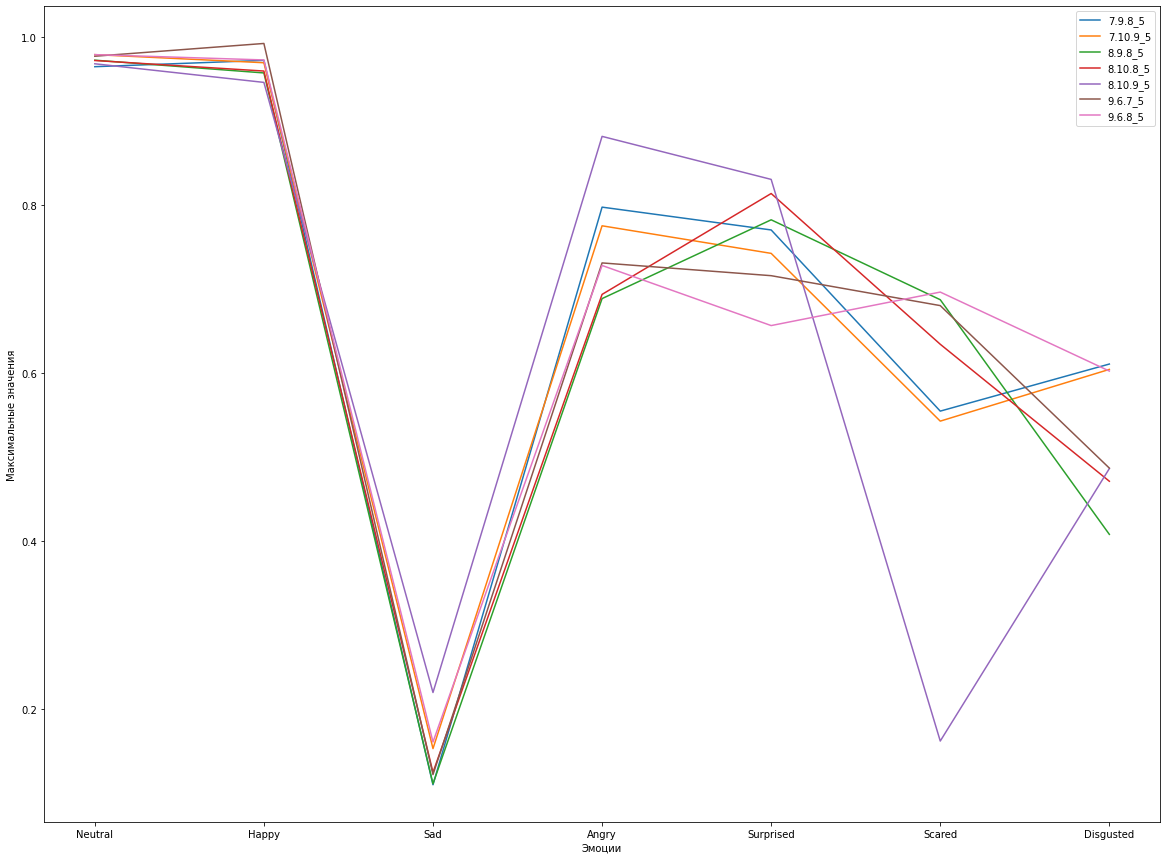

In [317]:
kwargs = {
    'models': models, 
    'df_clear': df_clear[fields], 
    'clear_count_dict': clear_count_dict,
    'df_metrics':pd.DataFrame(), 
    'df_clear_metrics': df_clear_metrics,
    'scale': True
}
df_clear_metrics = plot_emotions(**kwargs)

In [318]:
df_clear_metrics

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,mean,norm,stat
0,7.9.8_5,0.964601,0.972142,0.109812,0.797408,0.770251,0.554589,0.610625,?,?,?
1,7.10.9_5,0.978962,0.969324,0.152829,0.775196,0.74237,0.542658,0.604257,?,?,?
2,8.9.8_5,0.972358,0.957169,0.110917,0.68854,0.782329,0.68719,0.407857,?,?,?
3,8.10.8_5,0.971953,0.959429,0.12452,0.693539,0.813634,0.634177,0.471098,?,?,?
4,8.10.9_5,0.968067,0.945906,0.219619,0.881644,0.830436,0.161832,0.486166,?,?,?
5,9.6.7_5,0.977057,0.992254,0.121903,0.731005,0.715813,0.680193,0.486725,?,?,?
6,9.6.8_5,0.978957,0.972636,0.160663,0.727973,0.656422,0.696296,0.602264,?,?,?


### Вычисление norm метрики для seven_models_

In [319]:
for i in range(len(seven_models_)):
    difficult_res.append(models[i][2].model_metric(df_difficult_clear_test, 'norm'))

In [320]:
difficult_res

[0.43772417226663,
 0.4648142763055288,
 0.5143186933432634,
 0.49419364218528455,
 0.45414846619734395,
 0.5105764754689657,
 0.4903297848426379,
 0.43772417226663,
 0.4648142763055288,
 0.5143186933432634,
 0.49419364218528455,
 0.45414846619734395,
 0.5105764754689657,
 0.4903297848426379]

In [321]:
emotion = 'Angry'
n = 40
df_difficult_clear_test.sort_values(emotion)[-n:]

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:37.500_Бушунов Виктор_1,0.02,0.0,0.0,0.97,0.0,0.0,0.00,-0.97,0.83
00:00:35.000_Бушунов Виктор_1,0.02,0.0,0.0,0.97,0.0,0.0,0.00,-0.97,0.82
00:01:12.900_Бушунов Виктор_1,0.04,0.0,0.0,0.97,0.0,0.0,0.01,-0.97,0.69
00:01:13.500_Бушунов Виктор_1,0.03,0.0,0.0,0.97,0.0,0.0,0.01,-0.97,0.73
00:01:18.700_Бушунов Виктор_1,0.03,0.0,0.0,0.97,0.0,0.0,0.00,-0.97,0.66
00:01:12.800_Бушунов Виктор_1,0.03,0.0,0.0,0.97,0.0,0.0,0.00,-0.97,0.66
00:01:14.300_Бушунов Виктор_1,0.04,0.0,0.0,0.97,0.0,0.0,0.01,-0.97,0.72
00:00:39.900_Бушунов Виктор_1,0.05,0.0,0.0,0.97,0.0,0.0,0.00,-0.97,0.77
00:00:40.900_Бушунов Виктор_1,0.09,0.0,0.0,0.97,0.0,0.0,0.00,-0.97,0.71


In [323]:
models[0][2].predict(df_difficult_clear_test.sort_values(emotion)[-n:])

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:37.500_Бушунов Виктор_1,0.058522,1.955833e-19,0.078910,0.727375,0.000410,0.006498,0.208697
00:00:35.000_Бушунов Виктор_1,0.058030,1.742244e-19,0.078851,0.737179,0.000413,0.006019,0.207562
00:01:12.900_Бушунов Виктор_1,0.055616,2.229673e-19,0.078650,0.804937,0.000464,0.003115,0.191943
00:01:13.500_Бушунов Виктор_1,0.055592,1.455988e-19,0.078598,0.794375,0.000443,0.003565,0.196911
00:01:18.700_Бушунов Виктор_1,0.059484,2.972261e-19,0.079393,0.802116,0.000462,0.002656,0.196009
00:01:12.800_Бушунов Виктор_1,0.059484,2.972261e-19,0.079393,0.802116,0.000462,0.002656,0.196009
00:01:14.300_Бушунов Виктор_1,0.055598,1.619662e-19,0.078611,0.797055,0.000448,0.003447,0.195660
00:00:39.900_Бушунов Виктор_1,0.055628,9.771945e-20,0.078555,0.782692,0.000424,0.004101,0.201956
00:00:40.900_Бушунов Виктор_1,0.055604,1.801777e-19,0.078624,0.799708,0.000453,0.003332,0.194415


In [324]:
# Остановился на 7.9.8